In [1]:
import pandas as pd

# Tentukan path file
file_path = "J:\\Drive Saya\\analisa sentimen git\\percobaan 12\\data_sentimen.csv"

# Baca data CSV
df = pd.read_csv(file_path)

# Hitung jumlah sentimen
sentimen_counts = df['sentimen'].value_counts()

print(sentimen_counts)

sentimen
negative    110518
positive     59081
neutral      55187
Name: count, dtype: int64


C:\Users\ghiff\AppData\Local\Temp\ipykernel_8608\2545083958.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


C:\Users\ghiff\AppData\Local\Temp\ipykernel_8608\1820094340.py:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


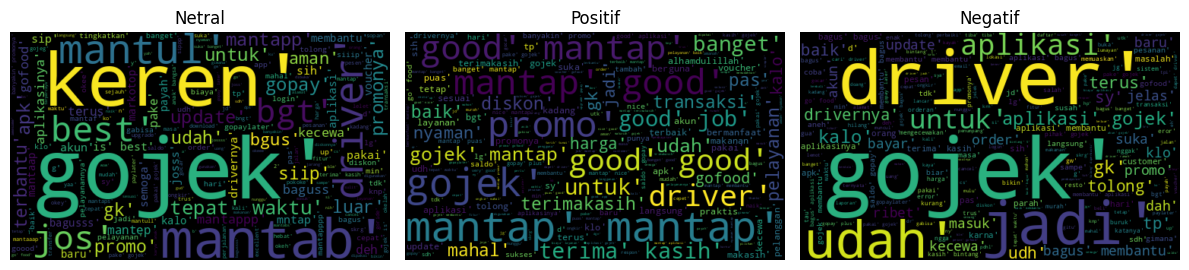

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tentukan path file
file_path = "J:\\Drive Saya\\analisa sentimen git\\percobaan 12\\data_sentimen.csv"

# Baca data CSV
df = pd.read_csv(file_path)

# Filter data berdasarkan sentimen
df_netral = df[df['sentimen'] == 'neutral']
df_positif = df[df['sentimen'] == 'positive']
df_negatif = df[df['sentimen'] == 'negative']

# Gabungkan semua kata dalam setiap sentimen
all_words_netral = ' '.join([twts for twts in df_netral['data_Preprocessing']])
all_words_positif = ' '.join([twts for twts in df_positif['data_Preprocessing']])
all_words_negatif = ' '.join([twts for twts in df_negatif['data_Preprocessing']])

# Generate WordCloud untuk setiap sentimen
wordcloud_netral = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_netral)
wordcloud_positif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_positif)
wordcloud_negatif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_negatif)

# Plot WordCloud
plt.figure(figsize=(12, 6))  # Atur ukuran keseluruhan plot

# WordCloud Netral
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_netral, interpolation="bilinear")
plt.axis('off')
plt.title('Netral')

# WordCloud Positif
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_positif, interpolation="bilinear")
plt.axis('off')
plt.title('Positif')

# WordCloud Negatif
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_negatif, interpolation="bilinear")
plt.axis('off')
plt.title('Negatif')

plt.tight_layout()  # Atur jarak antar plot
plt.show()

In [5]:
import pandas as pd

# Tentukan path file
file_path = "J:\\Drive Saya\\analisa sentimen git\\percobaan 12\\data_sentimen.csv"

# Baca data CSV
df = pd.read_csv(file_path)

# Hitung jumlah sentimen dan konversi ke persentase
sentimen_counts = df['sentimen'].value_counts(normalize=True) * 100

print(sentimen_counts)

sentimen
negative    47.615510
positive    35.292678
neutral     17.091812
Name: proportion, dtype: float64


C:\Users\ghiff\AppData\Local\Temp\ipykernel_17320\1086686967.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


C:\Users\ghiff\AppData\Local\Temp\ipykernel_8608\3176133619.py:10: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_path)


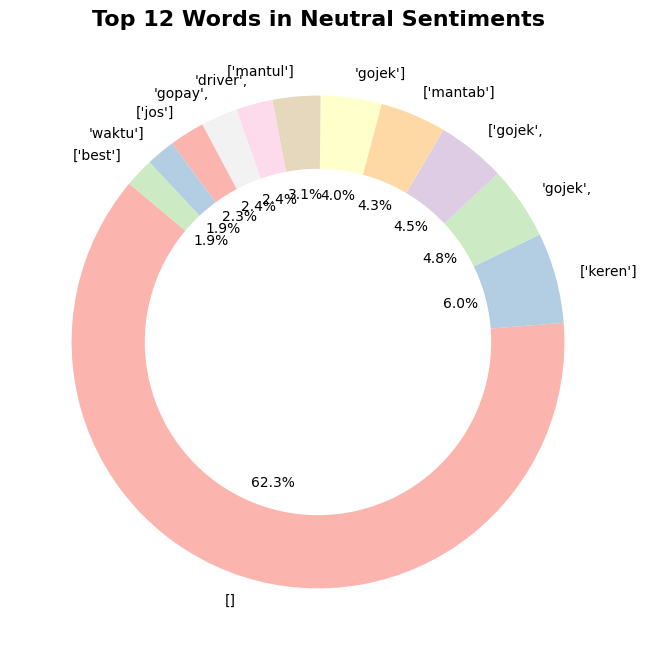

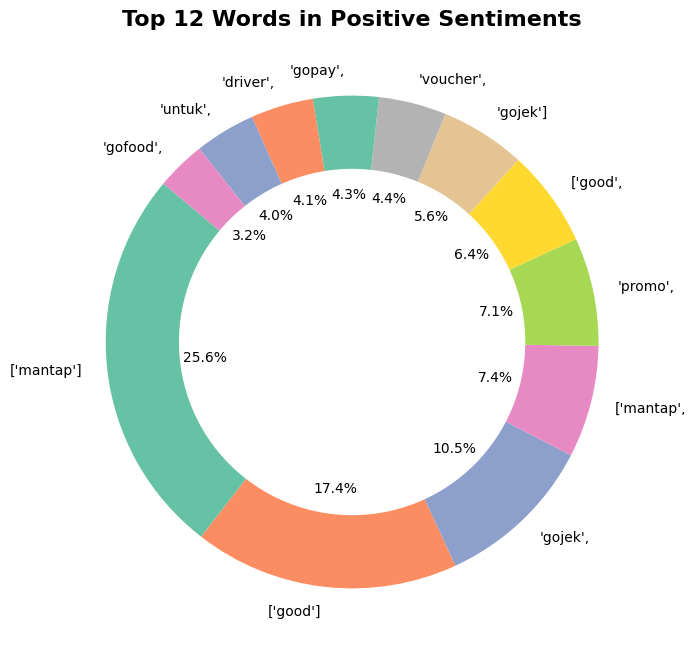

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

# Path file input
input_path = r'J:\Drive Saya\analisa sentimen git\percobaan 12\data_sentimen.csv'

# Load dataset
df = pd.read_csv(input_path)

# Filter data berdasarkan sentimen
df_neutral = df[df['sentimen'] == 'neutral']
df_positive = df[df['sentimen'] == 'positive']

# Fungsi untuk mendapatkan kata unik dan hitungannya
def get_top_words(df, top_n=12):
    all_words = df['data_Preprocessing'].str.split(expand=True).stack()
    word_counts = Counter(all_words)
    top_words = word_counts.most_common(top_n)
    words, counts = zip(*top_words)
    return pd.DataFrame({'words': words, 'count': counts})

# Neutral
top_neutral_words = get_top_words(df_neutral, top_n=12)

# Positive
top_positive_words = get_top_words(df_positive, top_n=12)

# Fungsi untuk membuat Donut Plot
def plot_donut(data, title, colors, save_path=None):
    plt.figure(figsize=(8, 8))
    my_circle = plt.Circle((0, 0), 0.7, color='white')
    plt.pie(data['count'], labels=data['words'], colors=colors, autopct='%1.1f%%', startangle=140)
    plt.gca().add_artist(my_circle)
    plt.title(title, fontsize=16, weight='bold')
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# Warna untuk Donut Plot
colors_neutral = ListedColormap(plt.cm.Pastel1.colors).colors
colors_positive = ListedColormap(plt.cm.Set2.colors).colors

# Plot dan Simpan Grafik
plot_donut(top_neutral_words, 'Top 12 Words in Neutral Sentiments', colors_neutral, save_path='neutral_donut_plot.png')
plot_donut(top_positive_words, 'Top 12 Words in Positive Sentiments', colors_positive, save_path='positive_donut_plot.png')
